# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import random
from citipy import citipy

# Import API key
from api_keys import api_key


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats=np.random.uniform(low=-90,high=90,size=2000)
lngs=np.random.uniform(low=-180,high=180, size=2000)
value=zip(lats,lngs)
for j in value:
    city = citipy.nearest_city(j[0],j[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

773

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url="https://api.openweathermap.org/data/2.5/weather?" 
units = "metric"
   
query_url = f"{url}appid={api_key}&units={units}&q="
City=[]
Country=[]
Latitude=[]
Longitude=[]
Cloudiness=[]
Humidity=[]
Max_Temperature=[]
Wind_speed=[]

i=0
for city in cities:
    response=requests.get(query_url+city).json()
    i=i+1

    try:
        City.append(response['name'])
        Country.append(response['sys']['country'])
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Max_Temperature.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Wind_speed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
    except KeyError:
        print ("city not found")



city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": City,
    "Country":Country,
    "Latitude": Latitude,
    "Longitude":Longitude,
    "Max_temperature":Max_Temperature,
    "Humidity":Humidity,
    "Wind_Speed":Wind_speed,
    "Cloudiness":Cloudiness
    }
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Country,Latitude,Longitude,Max_temperature,Humidity,Wind_Speed,Cloudiness
0,Rikitea,PF,-23.12,-134.97,23.89,87,1.44,53
1,Bodden Town,KY,19.28,-81.25,31.00,74,7.20,40
2,Siddipet,IN,18.10,78.85,23.08,81,2.06,13
3,Qaanaaq,GL,77.48,-69.36,-16.58,57,3.49,0
4,Tasiilaq,GL,65.61,-37.64,-2.00,58,6.70,40
5,Cabo San Lucas,MX,22.89,-109.91,28.33,83,1.86,75
6,Vaini,IN,15.34,74.49,20.86,98,1.44,100
7,ChengDe,CN,40.97,117.93,5.79,43,1.11,58
8,Te Anau,NZ,-45.41,167.72,8.30,84,1.25,100
9,Inuvik,CA,68.36,-133.71,-11.00,51,2.56,75


In [9]:
weather_data.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

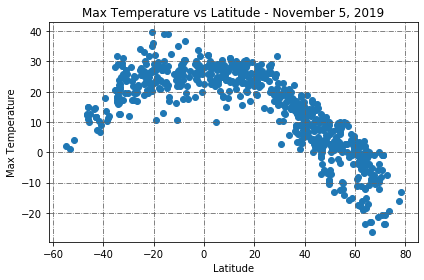

In [10]:
plt.scatter(weather_data.Latitude,weather_data.Max_temperature)
plt.title("Max Temperature vs Latitude - November 5, 2019")
plt.ylabel("Max Temperature ⁰C")
plt.xlabel("Latitude")
plt.show
plt.tight_layout()
plt.grid(b=True, which='major', color='#666666', linestyle='-.')

plt.savefig("Max Temperature vs Latitude - November 5, 2019.png")


#### Latitude vs. Humidity Plot

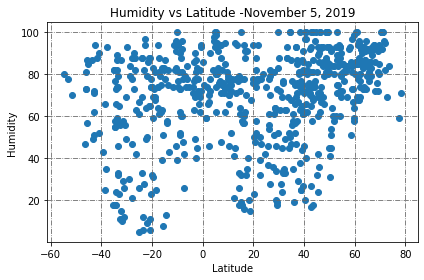

In [11]:
plt.scatter(weather_data.Latitude,weather_data.Humidity)
plt.title("Humidity vs Latitude -November 5, 2019")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show
plt.tight_layout()
plt.grid(b=True, which='major', color='#666666', linestyle='-.')

plt.savefig("Humidity vs Latitude  - November 5, 2019.png")


#### Latitude vs. Cloudiness Plot

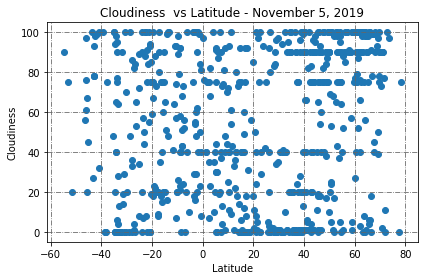

In [12]:
plt.scatter(weather_data.Latitude,weather_data.Cloudiness)
plt.title("Cloudiness  vs Latitude - November 5, 2019")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show
plt.tight_layout()
plt.grid(b=True, which='major', color='#666666', linestyle='-.')

plt.savefig("Cloudiness vs Latitude  - November 5, 2019.png")


#### Latitude vs. Wind Speed Plot

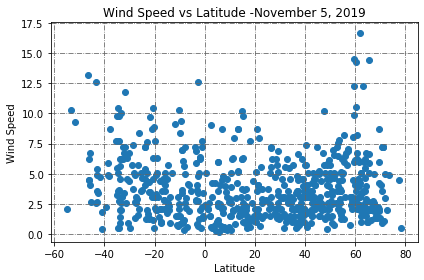

In [13]:
plt.scatter(weather_data.Latitude,weather_data.Wind_Speed)
plt.title("Wind Speed vs Latitude -November 5, 2019")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show
plt.tight_layout()
plt.grid(b=True, which='major', color='#666666', linestyle='-.')

plt.savefig("Wind Speed vs Latitude  - November 5, 2019.png")
